# Inferential Statistics 1a - Frequentism

## Learning objectives

Welcome to the first Frequentist inference mini-project! Over the course of working on this mini-project and the next frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

While it's great if you have previous knowledge about sampling distributions, this assignment will introduce the concept and set you up to practice working using sampling distributions. This notebook was designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. The second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 1. An introduction to sampling from the Normal distribution

First, let's explore the ways we can generate the Normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [2]:
norm?

>__A:__ The second listed method is the Probability Density Function (PDF).

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

In [3]:
seed(47)
# five normally distributed random samples
five_s = norm.rvs(size=5)
print('Five Samples: {}'.format(five_s))

Five Samples: [-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


>__A:__ The method we will use to generate five normally distributed sample variates will be the Random Variates (RVS) method. We will leave the `loc` and `scale` parameters to their default of 0 and 1, respectively. 

__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

In [4]:
# Mean of five samples using NumPy's mean
five_mean = np.mean(five_s)
print('Five Sample Mean: {:.4f}'.format(five_mean))

Five Sample Mean: 0.1936


>__A:__ The sample's mean is 0.1936 which makes sense, because it is relatively close to zero which is what the mean of the normal distribution which it came from has. It is impossible to exactly predict what the mean of a sample might be, even if we know the mean of the population it came from; especially with such a low number of samples taken. 

__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [5]:
five_std = np.sqrt(np.sum((five_s - five_mean) ** 2) / len(five_s))
print('Five Sample Standard Deviation: {:.4f}'.format(five_std))

Five Sample Standard Deviation: 0.9606


>__A:__ A standard deviation of 0.9606 makes a lot of sense, since the population's standard deviation is 1. 

Here we have calculated the actual standard deviation of a small (size 5) data set. But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

In [6]:
five_std = np.sqrt(np.sum((five_s - five_mean) ** 2) / (len(five_s) - 1))
print("Standard Deviation using Bessel's correction {:.4f}".format(five_std))

Standard Deviation using Bessel's correction 1.0740


> __A:__ Using Bessel's correction to calculate the five sample's population standard deviation brought the calculated standard deviation up to 1.0740. 

__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [7]:
np_std = np.std(five_s)
print("NumPy's Five Samples' Standard Deviation: {:.4f}".format(np_std))

NumPy's Five Samples' Standard Deviation: 0.9606


> __A:__ NumPy calculated the sample's standard deviation without Bessel's correction which yielded a standard deviation of 0.9606.

__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

In [8]:
np_std_corr = np.std(five_s, ddof=1)
print("NumPy's Standard Deviation using Bessel's correction {:.4f}".format(np_std_corr))

NumPy's Standard Deviation using Bessel's correction 1.0740


> __A:__ In order to apply Bessel's correction withing NumPy's standard deviation function, we have to set the deegrees of freedom (`ddof`) parameter equal to 1.

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your data set _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting at this point if your sample is your population then you know absolutely everything about your population, there are no probabilities really to calculate and no inference to be done.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population and the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

You're now firmly in frequentist theory territory. Great work so far! Now let's dive deeper.

## 2. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as $n$ increases. For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [9]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

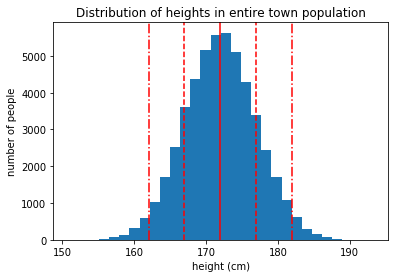

In [10]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [11]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [12]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

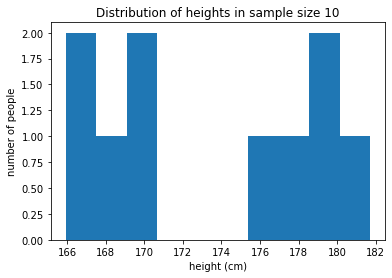

In [13]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [14]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [15]:
daily_sample2 = townsfolk_sampler(10)

In [16]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

In [17]:
seed(47)
# daily samples of 10 for a whole year (365 samples)
daily_means = []
for i in range(365):
    daily_means.append(np.mean(townsfolk_sampler(10)))

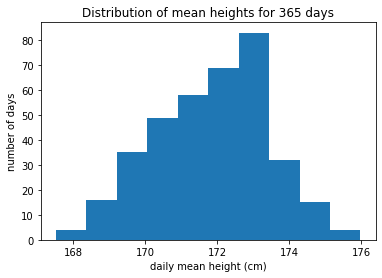

In [18]:
plt.hist(daily_means)
plt.xlabel('daily mean height (cm)')
plt.ylabel('number of days')
plt.title('Distribution of mean heights for 365 days')
plt.show()

> __A:__ The frequency histogram of the daily sample means can be seen above. 

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

In [19]:
print("Daily Height Means w/ 10 Daily Samples\n")

avg_means = np.mean(daily_means)
print("           Average: {:.2f} cm".format(avg_means))

std_means = np.std(daily_means)
print("Standard Deviation:   {:.2f} cm".format(std_means))

Daily Height Means w/ 10 Daily Samples

           Average: 171.87 cm
Standard Deviation:   1.58 cm


>__A:__ The daily height means' average is 0.13 cm away from the true population height average of 172 cm, and the standard deviation does indeed turn out to be correctly predicted by the population parameter and the number of samples which predicted the sample means' standard deviation to be 1.58 cm. This is of great importance, since the unkown population parameters can be predicted by using the sample means' standard deviation and the number of samples within a single sample. 

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

In [20]:
seed(47)
# daily samples of 50 for a whole year (365 samples)
daily_means_50 = []
for i in range(365):
    daily_means_50.append(np.mean(townsfolk_sampler(50)))

In [21]:
print("CLT Predicted Daily Means' Variance using 50 Daily Samples: {:.2f}".format(5 / np.sqrt(50)))

CLT Predicted Daily Means' Variance using 50 Daily Samples: 0.71


In [22]:
print("Daily Height Means w/ 50 Daily Samples\n")

avg_means_50 = np.mean(daily_means_50)
print("           Average: {:.2f} cm".format(avg_means_50))

std_means_50 = np.std(daily_means_50)
print("Standard Deviation:   {:.2f} cm".format(std_means_50))

Daily Height Means w/ 50 Daily Samples

           Average: 171.94 cm
Standard Deviation:   0.67 cm


>__A:__ Using the CLT's calculation of the means' standard deviation from the population parameter and the number of samples in each sample where the predicted means' variation should decrease as number of samples increases, we can conclude that the variation of the samples' means will decrease; after sampling 365 samples of size 50 each, we can confirm that the standard deviation of the sample means did decrease. However, the means' CLT predicted standard deviation was predicted to be 0.71 cm but ended up being 0.67 cm. Even though the exact standard deviation was not predicted, the CLT's predicted standard deviation of 0.71 cm correctly predicted a decrease in variation as sample size increased from 10 to 50; CLT predicted the standard deviation of the means with sample sizes of 10 to be 1.58 cm. Also, it can be noted that increasing the sample size gets the mean of the daily means closer to the true population mean of 172 cm. 

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### 3. Normally testing times!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but you still have to estimate them somehow. If we want to make inferences such as "is this observation unusual?" or "has my population mean changed?" then you need to have some idea of what the underlying distribution is so you can calculate relevant probabilities. In frequentist inference, you use the formulas above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution.

In [23]:
less_one = 50 + 68 / 2
print("Probability of Single Observation Being Less than 1: {:.0f}%".format(less_one))

Probability of Single Observation Being Less than 1: 84%


>__A:__ Since the probability of a single observation being within +/- 1 standard deviation of the mean is equal to 68%, this means that there is a 34% probability of a single observation being between the mean and a +1 standard deviation; also the probability of an observation being below the mean is 50%. Therefore, the probability of a single observation being less than a +1 standard deviation from the mean is equal to the probability of the observation being between the mean and a +1 standard deviation, i.e. 34%, plus the probability of a single observation being less than the mean, i.e. 50%; adding those two probabilities together gives us a probability of 84%. 

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

In [24]:
cdf_less_one = norm.cdf(1)
print("Probability of Single Observation Being Less than 1 (using SciPy's CDF): {:.2f}%".format(cdf_less_one * 100))

Probability of Single Observation Being Less than 1 (using SciPy's CDF): 84.13%


> __A:__ As it can be seen above, SciPy confirms our estimate of the probabiliy of a single observation being less than +1 standard deviation from the mean being about 84%; the only reason SciPy's probability is 0.13% greater than our calculation is that we used the rounded probability of a single observation being between +/- 1 standard deviations, where the exact probability is closer to 68.27%.

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less?

In [25]:
cdf_less_177 = norm.cdf(177, 172, 5)
print("Probability of Single Observation Being Less than 177 cm: {:.2f}%".format(cdf_less_177 * 100))

Probability of Single Observation Being Less than 177 cm: 84.13%


> __A:__ The probability is the same as the previous problem, because the value 177 cm is essentially +1 standard deviation from the mean; the mean of the population is 172 cm and its standard deviation is 5 cm, so a single +1 standard deviation from the mean is equal to $172+5=177$ cm.

__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [26]:
cdf_greater_200 = 1 - norm.cdf(200, 172, 5)
print("Probability of Single Observation Being Greater than 200 cm: {:.6f}%".format(cdf_greater_200 * 100))
print("Expected No. of People Taller than 200 cm in Population of 50,000: {:.0f}".format(cdf_greater_200 * 50000))

Probability of Single Observation Being Greater than 200 cm: 0.000001%
Expected No. of People Taller than 200 cm in Population of 50,000: 0


> __A:__ We would be very surprised, since probability of a person being 200 cm or taller is about 0.000001%, i.e. very low; given this probability, the number of people expected to be 200 cm or taller in a population of 50,000 is equal to 0. 

We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value. We have essentially just performed a z-test (albeit without having prespecified a threshold for our "level of surprise")!

We're about to come to a pinch, though here. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

In [27]:
seed(47)
# sample of 50 townsfolk
sample_50 = townsfolk_sampler(50)
mean_50 = np.mean(sample_50)
std_50 = np.std(sample_50, ddof=1)
std_err_50 = std_50 / np.sqrt(50)
crit_z_50 = norm.ppf([0.025, 0.975])
moe_z_50 = crit_z_50 * std_err_50
inter_z_50 = mean_50 + moe_z_50

In [28]:
print('Sample Size: 50 |\n----------------\n', 
      '    Sample Mean: {:8.2f} cm\n'.format(mean_50), 
      '    Sample Stat: {:8.2f} cm\n'.format(std_50), 
      ' Standard Error: {:8.2f} cm\n'.format(std_err_50),             
      ' (95%) Z-Score : {:8.2f} cm\n'.format(crit_z_50[1]),       
      'Margin of Error: +/- {:.2f} cm\n'.format(moe_z_50[1]),
      '  Mean Interval: {:.2f} cm to {:.2f} cm'.format(inter_z_50[0], inter_z_50[1]))

Sample Size: 50 |
----------------
     Sample Mean:   172.78 cm
     Sample Stat:     4.20 cm
  Standard Error:     0.59 cm
  (95%) Z-Score :     1.96 cm
 Margin of Error: +/- 1.16 cm
   Mean Interval: 171.62 cm to 173.94 cm


>__A:__ Since we do not know the true population standard deviation, we will use the sample statistic, i.e. sample standard deviation, which is an unbiased estimate of the population parameter, i.e. population's standard deviation; when calculating the sample statistic we will use the $n-1$ denominator. Also, we do not know the population parameter, so we will have to use the standard error when calculating the margin of error; the standard error is equal to the sample statistic divided by the square root of the sample size, i.e. $\frac{sample \ statistic}{\sqrt{sample \ size}}$. The 95% margin of error is equal to the standard error multiplied by the critical z-score corresponding to the 95% confidence level; a margin of error of +/- 1.16 cm was calculated. After applying the margin of error to the calculated mean of 172.78 cm, we were able to say with 95% confidence that the true population mean is between 171.62 cm and 173.94 cm; this 95% interval includes the true population mean of 172 cm.  

__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

>__A:__ In order to use the z-score, we have to know the population's standard deviation and have a sample size greater than 30; we do not know the population's standard deviation, so we should have used the t-score to calculate the critical value. 

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

In [29]:
crit_t_50 = t.ppf([0.025, 0.975], df=49)
moe_t_50 = crit_t_50 * std_err_50
inter_t_50 = mean_50 + moe_t_50

In [30]:
print('Sample Size: 50 |\n----------------\n', 
      '           Mean: {:8.2f} cm\n'.format(mean_50), 
      '        Std Err: {:8.2f} cm\n'.format(std_err_50),       
      '  (95%) T-Score: {:8.2f} cm\n'.format(crit_t_50[1]),       
      'Margin of Error: +/- {:.2f} cm\n'.format(moe_t_50[1]),
      '  Mean Interval: {:.2f} cm to {:.2f} cm'.format(inter_t_50[0], inter_t_50[1]))

Sample Size: 50 |
----------------
            Mean:   172.78 cm
         Std Err:     0.59 cm
   (95%) T-Score:     2.01 cm
 Margin of Error: +/- 1.19 cm
   Mean Interval: 171.59 cm to 173.97 cm


>__A:__ To use the z-score, we have to have a sample size greater than 30 and know the population parameter; since we do not know the population parameter, we cannot use the z-score. Instead, we will use the t-score along with the standard error to calculate the sample's real margin of error; using 49 degrees of freedom and a desired 95% confidence level to calculate the t-score, we arrived at a wider margin of error of +/- 1.19 cm. Finally, after applying the margin of error to the calculated mean of 172.78 cm, we were able to say with 95% confidence that the true population mean is between 171.59 cm and 173.97 cm; this 95% interval includes the true population mean of 172 cm. 

This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* what a sampling distribution is and how the Central Limit Theorem applies
* how to calculate critical values and confidence intervals